# Assignment 1

First we need to import a few modules, execute the cell below:

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define a function `f` that is equivalent to $f(x)=\cos(x)$. It should work both for single arguments and `numpy` arrays.

In [2]:
def f(x):
    return numpy.cos(x)
    
    '''Function equivalent to cos(x), should work for one argument or a numpy array'''
    # YOUR CODE HERE

You can use the following cell to check that your code works for scalar arguments:

In [3]:
assert numpy.isclose(f(0.5),0.87758256189)

Make sure your code also works with a numpy array:

In [4]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            f(xs), 
            [0.99500417, 0.98006658, 0.95533649, 0.92106099, 0.87758256, 0.82533561]
        ).all()

Define the analytic derivative of the function`f` here (again, it should work both for single numbers and numpy arrays).

In [5]:
def df_analytic(x):
    return -numpy.sin(x)

    '''
    The analytic derivative
    '''
    

In [6]:
assert numpy.isclose(df_analytic(0.5), -0.4794255386)

In [7]:
xs = numpy.arange(start=0.1, stop=0.7, step=0.1)
assert numpy.isclose(
            df_analytic(xs),
            [-0.09983342, -0.19866933, -0.29552021, -0.38941834, -0.47942554,-0.56464247]
        ).all()

Now define the numerical derivative using the backward difference method. The function `backward_difference` takes three arguments, `f`, the function to calculate the derivative for, `x` the position to calculate the derivative at and `dx` the interval length.

In [8]:
def backward_difference(f, x, dx):
    return (f(x)-f(x-dx))/dx
    '''
    This function implements the backward difference method for the 
    first derivative of the function f at position x using interval
    dx.
    '''
    # YOUR CODE HERE

In [9]:
assert numpy.isclose(
    backward_difference(f, 0.1, 0.0001),
    -0.09978366627194646
)

**Task 1:**

Here is a skeleton code to plot the difference between the analytical derivative and the numerical implementation. Modify and expand it to provide a plot with three curves for the difference for a case where $dx$ is too large, about right and too small. The plot should have a legend, labelled axes and a title.

You can get help about plotting on the Python handbook that you can find at:

https://dmaitre.phyip3.dur.ac.uk/notes/l1python/part-5/


Text(0.5,1,'A Graph to Show the Proximity of numerical derivatives to the analytical derivative of cos(x) \n with different values for dx, using the finite difference method')

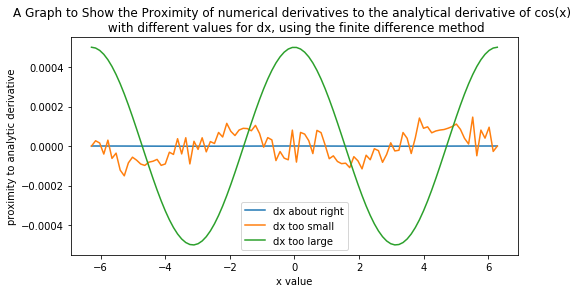

In [10]:
xs = numpy.linspace(-2*numpy.pi,2*numpy.pi,100)
df_dx_1 = backward_difference(f, xs, dx=1e-6)
df_dx_2 = backward_difference(f, xs, dx=1e-12)
df_dx_3 = backward_difference(f, xs, dx=1e-3)
df_dx_analytical = df_analytic(xs)
plt.figure(figsize=(8, 4))
line1 = plt.plot(xs, df_dx_1 - df_dx_analytical, label= "dx about right")
line2 = plt.plot(xs, df_dx_2 - df_dx_analytical, label= "dx too small")
line3 = plt.plot(xs, df_dx_3 - df_dx_analytical, label= "dx too large")
plt.legend()
plt.xlabel("x value")
plt.ylabel("proximity to analytic derivative")
plt.title("A Graph to Show the Proximity of numerical derivatives to the analytical derivative of cos(x) \n with different values for dx, using the finite difference method")

##### **Task 2: ** 

Describe in the text box below why the numerical method looses accuracy in the case where
$\Delta x$ is too small and the case where $\Delta x$ is too large. (Double-click on "YOUR ANSWER HERE" to edit.)


The erratic errors when dx is too small are caused by the way the very small values are stored by the programme. It can only store numbers to a certain precision, so some later digits are lost when storing a value. When this value is later used in a calculation it produces an error in the result.
The error when dx is too large is a periodic error mirroring the cos graph. This is because when the line y = cos(x) is very curved, and dx is larger, the line connecting f(x) and f(x-dx) isn't very tangential to the actual line, so its gradient doesn't closely match the gradient of y=cos(x). However when cos(x) approaches 0, its gradient changes less rapidly so the line between f(x) and f(x-dx) is closer to a tangent to the line, therefore more accurately represents the gradient.